# Diabetes diagnosis

In [42]:
import pandas as pd
import arff
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## Load dataset

In [43]:
df_path = "../datasets/diabetes.arff"

def get_df(path):
    with open(df_path, 'r') as file:
        arff_data = arff.load(file)
    # Convert to pandas DataFrame
    df = pd.DataFrame(arff_data['data'], columns=[attr[0] for attr in arff_data['attributes']])
    return df

df = get_df(df_path)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


## Apply f_classif

In [44]:
y = df["Outcome"]
X = df.drop(columns="Outcome")

f_scores, p_values = f_classif(X, y)

## Plot the results

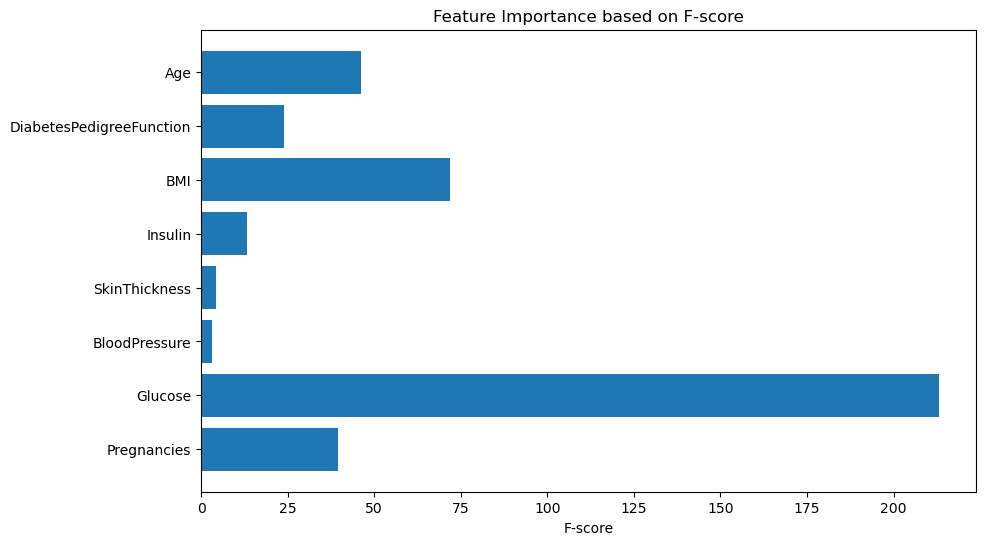

In [45]:
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, f_scores, align='center')
plt.xlabel('F-score')
plt.title('Feature Importance based on F-score')
plt.show()

## Decision tree classifier ##

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = DecisionTreeClassifier(random_state=1, min_samples_split=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


## Testing the results ##

In [47]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8051948051948052
Precision: 0.802332361516035
Recall: 0.8051948051948052
F1 Score: 0.8024402068519716
Confusion Matrix:
[[87 12]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        99
           1       0.76      0.67      0.71        55

    accuracy                           0.81       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.80      0.81      0.80       154

